# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

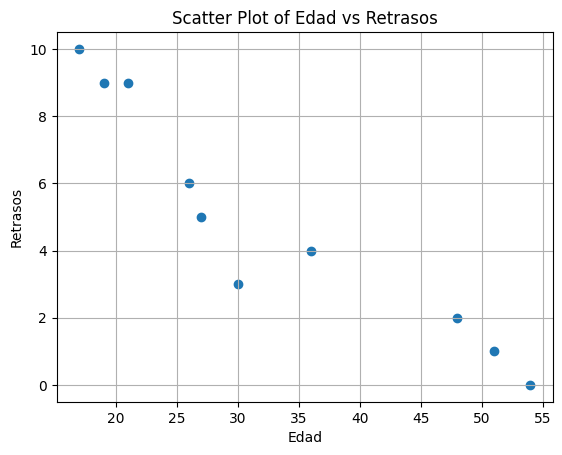

In [5]:
# Generate the scatter plot
plt.scatter(student_data['Edad'], student_data['Retrasos'])
plt.title('Scatter Plot of Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Parece que hay una correlación lineal negativa entre edad y retrasos. 

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [6]:
# Calcular la covarianza
cov_matrix = student_data.cov()
print("Matriz de Covarianza:")
print(cov_matrix)

# Calcular la correlación
corr_matrix = student_data.corr()
print("\nMatriz de Correlación:")
print(corr_matrix)

# hay indicios de una correlación negativa fuerte entre las dos variables.

Matriz de Covarianza:
                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444

Matriz de Correlación:
              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [9]:
# Variables independientes (X) y dependientes (y)
X = student_data[['Edad']]
y = student_data['Retrasos']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Obtener los coeficientes y el intercepto
coef = model.coef_[0]
intercept = model.intercept_

# Hacer predicciones para el conjunto completo
y_pred = model.predict(X)

# Mostrar los coeficientes
print(f"Coeficiente de la regresión: {coef:.2f}")
print(f"Intersección (intercepto): {intercept:.2f}")

Coeficiente de la regresión: -0.24
Intersección (intercepto): 12.89


Grafica tu modelo de regresión en tu diagrama de dispersión.

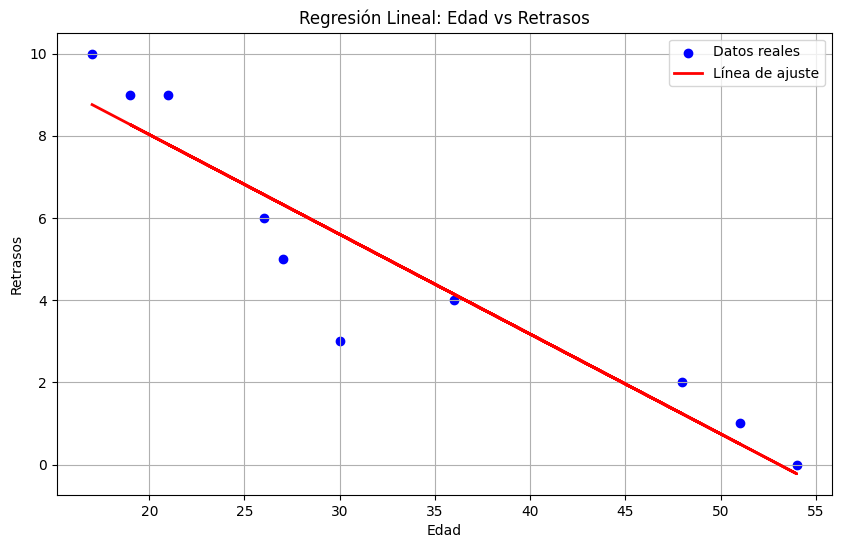

In [11]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de ajuste')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Regresión Lineal: Edad vs Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [17]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.


La variable con mayor correlación con 'CO2 Emission Grams/Mile' es 'Fuel Barrels/Year' con una correlación de 0.99


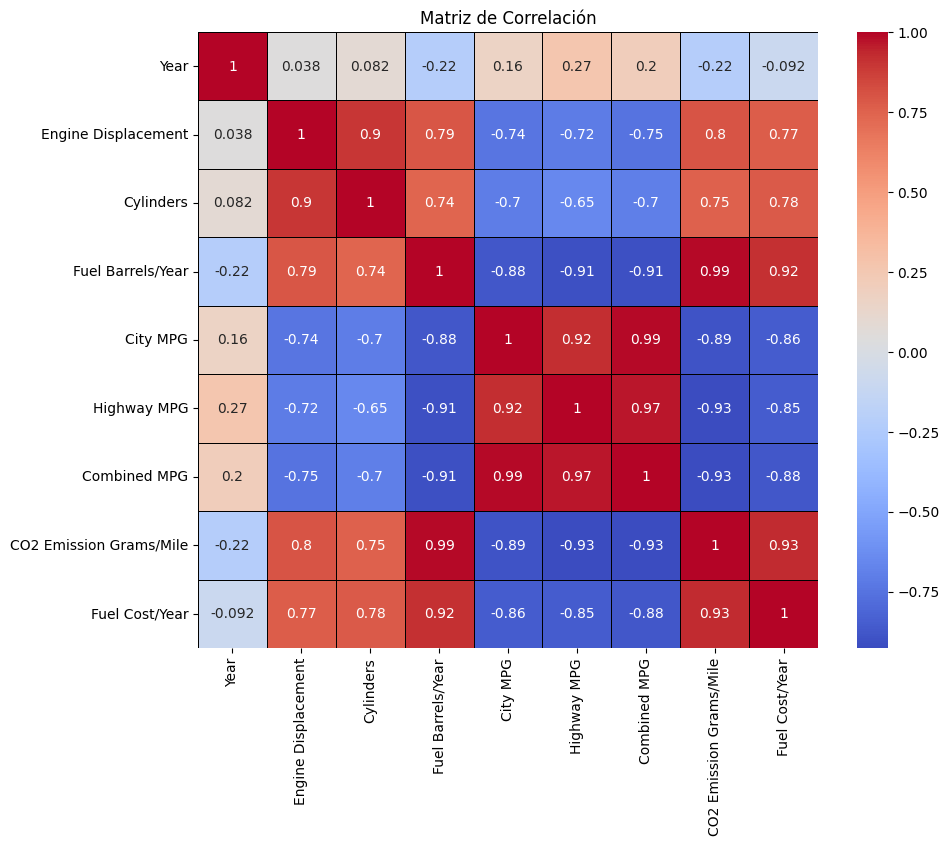

In [18]:
# Seleccionar solo las columnas numéricas
numeric_columns = vehicles.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Identificar la variable con mayor correlación absoluta con 'CO2 Emission Grams/Mile'
target = 'CO2 Emission Grams/Mile'
correlations_with_target = correlation_matrix[target].drop(target)  # Excluir la correlación consigo misma
max_correlation_variable = correlations_with_target.abs().idxmax()
max_correlation_value = correlations_with_target[max_correlation_variable]

print(f"\nLa variable con mayor correlación con '{target}' es '{max_correlation_variable}' con una correlación de {max_correlation_value:.2f}")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación')
plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Coeficiente de la regresión: 26.28
Intersección (intercepto): 12.49
R^2: 0.97


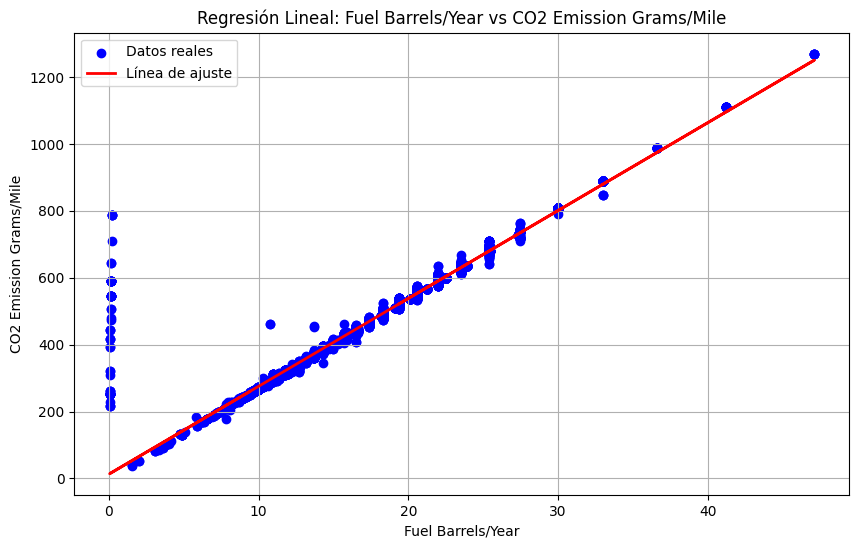

In [19]:
df = pd.DataFrame(vehicles)

# Variables independientes (X) y dependientes (y)
X = df[['Fuel Barrels/Year']]
y = df['CO2 Emission Grams/Mile']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Evaluar el modelo
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f"Coeficiente de la regresión: {coef:.2f}")
print(f"Intersección (intercepto): {intercept:.2f}")
print(f"R^2: {r2:.2f}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de ajuste')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Regresión Lineal: Fuel Barrels/Year vs CO2 Emission Grams/Mile')
plt.legend()
plt.grid(True)
plt.show()

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# La variable definida es un buen predictor de las emissiones, tiene una excelente correlación, y se ajusta a la linea de regresión lineal.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*